<a href="https://colab.research.google.com/github/jobawz/Final_SP/blob/main/sp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference :https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/

# Import Libraries

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install tensorflow
!pip install -U tensorflow
!pip install Keras-Preprocessing
!pip install --upgrade tensorflow
#!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import re
#import emoji
import string
import spacy
import keras
import tensorflow as tf
import math
import csv
import os
import matplotlib as mpl
import matplotlib.cm as cm
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
#stop_words = stopwords.words()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn import datasets
from nltk.data import find, load
from nltk.tag.api import TaggerI
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
print(pad_sequences)
from keras_preprocessing.sequence import pad_sequences
print(pad_sequences)
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

<function pad_sequences at 0x7f3a63334a60>
<function pad_sequences at 0x7f3a5f519240>


# Data Upload & Rating Annotaion

In [ ]:
df = pd.read_csv('cleaned_file.csv')
df = df.astype(str)
#df = pd.read_csv('prototype.csv')
df

,Source,Rating,text,sentiment,label
0,stc pay,1,:thumbs_down: :thumbs_down: :thumbs_down: pres...,Negative,0
1,stc pay,5,easy reliable greatest app money transfer saud...,Positive,1
2,stc pay,1,bad beyond measure comments pleases account cu...,Negative,0
3,stc pay,1,complaint problem paid riyals ship ps amount w...,Negative,0
4,stc pay,1,moldy application transfer delivered except hu...,Negative,0
...,...,...,...,...,...
9780,اليسر,5,may accept request promotional code,Positive,1
9781,اليسر,3,promo code promo code,Negative,0
9782,اليسر,5,terrible program easy smooth use steps short :...,Positive,1
9783,اليسر,5,program excellent save time effort easy use,Positive,1


In [ ]:
df["text"] = df['Title'].astype(str) +". "+ df["Content"]
df

KeyError: ignored

In [ ]:
df.drop(['Date', 'Title','Content','Name','Version'], axis = 1, inplace = True)
df

In [ ]:
#df['sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))
df['sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else ('Negative'))
df

In [ ]:
df['label'] = np.where(df['Rating'] > 3, 1, 0)
print('{:.2f}% are positive reviews'.format(df['label'].mean()*100))
df

In [ ]:
df.to_csv('new.csv', index=False)
df = pd.read_csv('new.csv')
df

# English Translation

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip uninstall googletrans
!pip install googletrans==4.0.0-rc1
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()
!pip install deep-translator
from deep_translator import GoogleTranslator

Found existing installation: googletrans 4.0.0rc1
Uninstalling googletrans-4.0.0rc1:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.10/dist-packages/googletrans-4.0.0rc1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/googletrans/*
Proceed (Y/n)? y
  Successfully uninstalled googletrans-4.0.0rc1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached googletrans-4.0.0rc1-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# Load CSV file into a pandas dataframe
df = pd.read_csv('new.csv')

# Specify the column containing the Arabic text to be translated
arabic_col = 'text'

# Translate each row of the specified column from Arabic to English
for i, row in df.iterrows():
    arabic_text = row[arabic_col]
    english_text = GoogleTranslator(source='ar', target='en').translate(arabic_text)
    df.at[i, arabic_col] = english_text

# Save the translated dataframe to a new CSV file
df.to_csv('translated_file.csv', index=False)

In [ ]:
df = pd.read_csv('translated_file.csv')
df

,Source,Rating,text,sentiment,label
0,stc pay,1,"👎👎👎. Why, if I press the word Use the current ...",Negative,0
1,stc pay,5,Easy and reliable. Greatest app to do money tr...,Positive,1
2,stc pay,1,Bad beyond measure. He comments and does what ...,Negative,0
3,stc pay,1,complaint. I had a problem and paid 38 riyals ...,Negative,0
4,stc pay,1,Moldy application. The transfer is not deliver...,Negative,0
...,...,...,...,...,...
9780,اليسر,5,a. May accept and request a promotional code,Positive,1
9781,اليسر,3,promo code. Whats the promo code,Negative,0
9782,اليسر,5,Terrible. The program is very easy and smooth ...,Positive,1
9783,اليسر,5,The program is excellent. Save time and effort...,Positive,1


# Data Preprocessing & Visualization

In [ ]:
df["Rating"].value_counts()

1    4481
5    4071
2     457
3     391
4     385
Name: Rating, dtype: int64

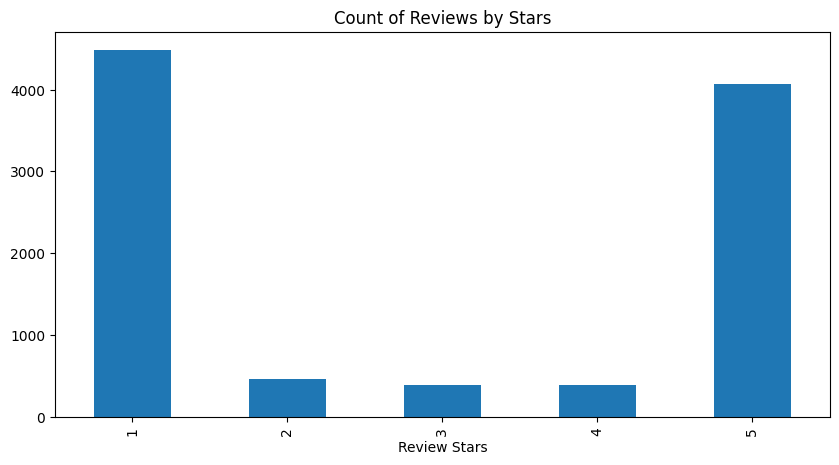

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
fig = go.Figure([go.Bar(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [ ]:
fig = go.Figure([go.Bar(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [ ]:
df["sentiment"].value_counts()

Negative    5329
Positive    4456
Name: sentiment, dtype: int64

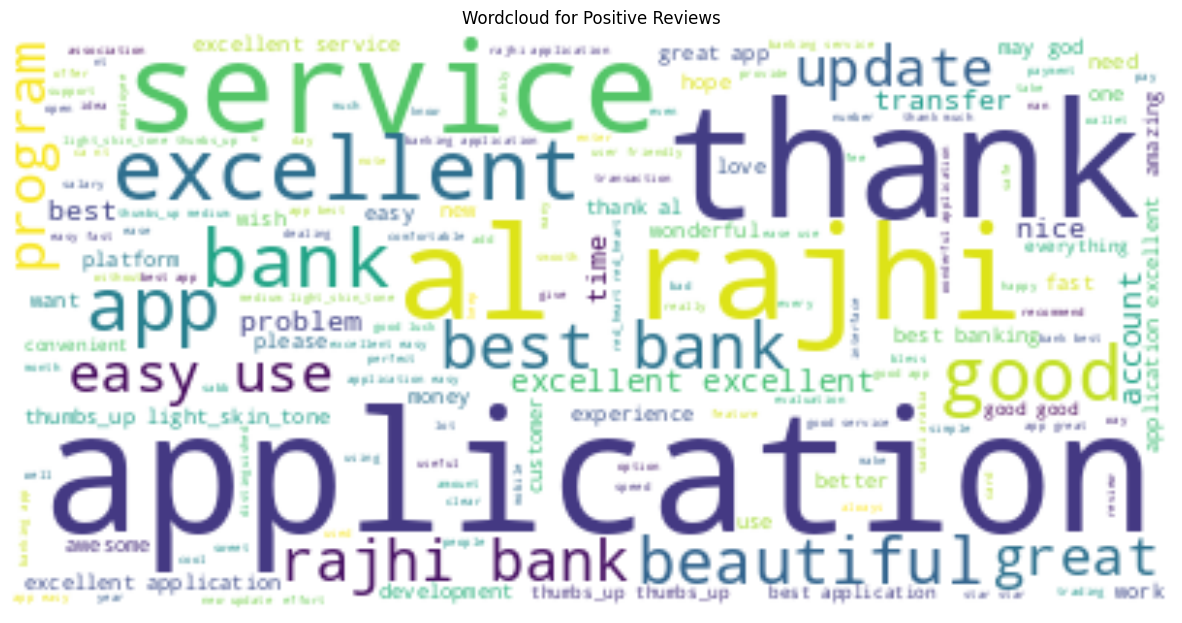

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='Positive']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Positive Reviews')
plt.show()


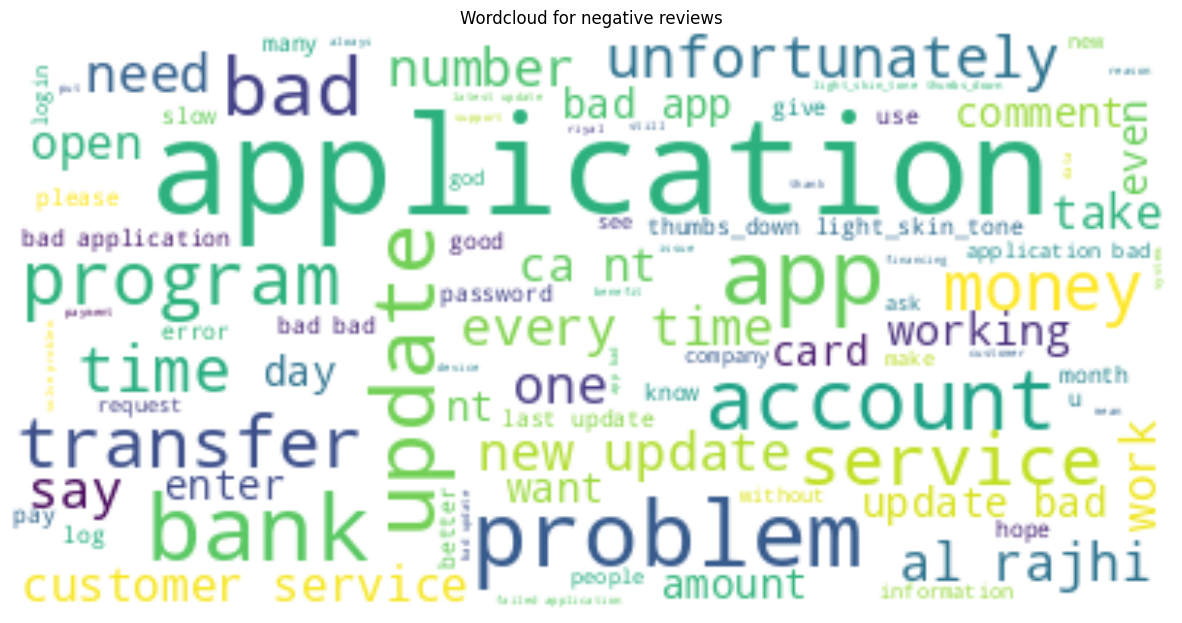

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='Negative']['text'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for negative reviews')
plt.show()

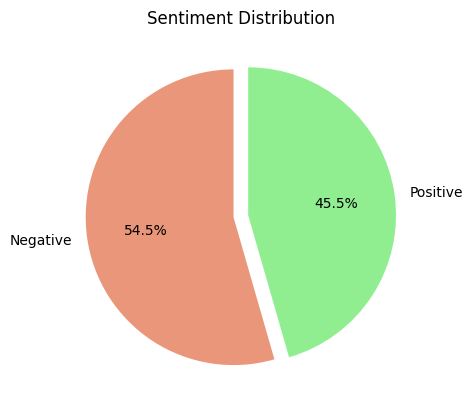

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file (replace "your_dataset.csv" with your actual file name)
data = pd.read_csv("cleaned_file.csv")

# Filter the data to exclude the "Neutral" sentiment category
filtered_data = data[data['sentiment'] != 'Neutral']

# Count the number of occurrences of each sentiment label
sentiment_counts = filtered_data['sentiment'].value_counts()

# Extract the sentiment labels and count values
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Create a pie chart to visualize the sentiment distribution
colors = ['darksalmon', 'lightgreen'] # Customize the colors
explode = (0.05, 0.05) # Add some spacing between the slices

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Sentiment Distribution')

# Display the chart
plt.show()

In [ ]:
import pandas as pd

# Load the data (replace "data.csv" with your actual file name)
data = pd.read_csv("cleaned_file.csv")

# Construct a regular expression pattern to match 'alrajhi', 'Al Rajhi', and 'AlRajhi'
alrajhi_pattern = 'alrajhi|Al Rajhi|AlRajhi'

# Group by all the 'alrajhi' labels in the 'Source' column
alrajhi_data = data[data['Source'].str.contains(alrajhi_pattern, na=False)].groupby('Source').mean()

# Construct a regular expression pattern to match 'SNB' and related terms
snb_pattern = 'SNB|SNB AlAhli Aqar|SNB Capital|SNB Capital Mobile|SNB Mobile|SNB eCorp'

# Group by all the 'SNB' labels in the 'Source' column
snb_data = data[data['Source'].str.contains(snb_pattern, na=False)].groupby('Source').mean()


# Define the pattern to match in the 'Source' column
stc_pattern = 'stc|Saudi Telecom|Jawwy'

# Group by all the 'stc' labels in the 'Source' column
stc_data = data[data['Source'].str.contains(stc_pattern, na=False)].groupby('Source').mean()

# Define the pattern to match in the 'Source' column
alinma_pattern = 'alinma|Alinma Bank|Alinma'

# Group by all the 'alinma' labels in the 'Source' column
alinma_data = data[data['Source'].str.contains(alinma_pattern, na=False)].groupby('Source').mean()

# Concatenate the data into a single DataFrame
all_data = pd.concat([alrajhi_data, snb_data, stc_data, alinma_data])

# Create a new column 'Pattern' and set its value based on the 'Source' column
data['Pattern'] = data['Source']
data.loc[data['Source'].str.contains(alrajhi_pattern, na=False), 'Pattern'] = 'AlRajhi'
data.loc[data['Source'].str.contains(snb_pattern, na=False), 'Pattern'] = 'SNB'
data.loc[data['Source'].str.contains(stc_pattern, na=False), 'Pattern'] = 'STC'
data.loc[data['Source'].str.contains(alinma_pattern, na=False), 'Pattern'] = 'AlInma'

# Save the updated data to a new CSV file (replace "updated_data.csv" with your desired file name)
data.to_csv("Grouped.csv", index=False)

<ipython-input-96-ef2fbdceb5fe>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  alrajhi_data = data[data['Source'].str.contains(alrajhi_pattern, na=False)].groupby('Source').mean()
<ipython-input-96-ef2fbdceb5fe>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  snb_data = data[data['Source'].str.contains(snb_pattern, na=False)].groupby('Source').mean()
<ipython-input-96-ef2fbdceb5fe>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('Grouped.csv')

grouped_df = df.groupby('Pattern').mean()

# print the grouped DataFrame
print(grouped_df)

                                  Rating     label
Pattern                                           
ANB Mobile~ Arab National Bank  2.106061  0.212121
Abyan | أبيان                   2.168675  0.265060
AlInma                          3.598168  0.626963
AlRajhi                         3.588770  0.633155
Albilad App                     1.559701  0.059701
Alj Finance                     1.000000  0.000000
Aseel | أصيل                    1.974359  0.179487
Awaed عوائد                     1.851852  0.185185
Binance: Buy Bitcoin Securely   3.143939  0.500000
Circlys | سيركليز               2.996350  0.463504
Derayah                         2.000000  0.250000
EMKAN                           1.520408  0.122449
EO Broker                       4.781818  0.945455
MOLIM                           2.587629  0.371134
Malaa                           2.837838  0.459459
Mobily Pay                      2.078947  0.236842
Olymp Trade - Online Trading    2.875000  0.468750
PayPal                         

<ipython-input-97-443968ce0e32>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('Pattern').mean()


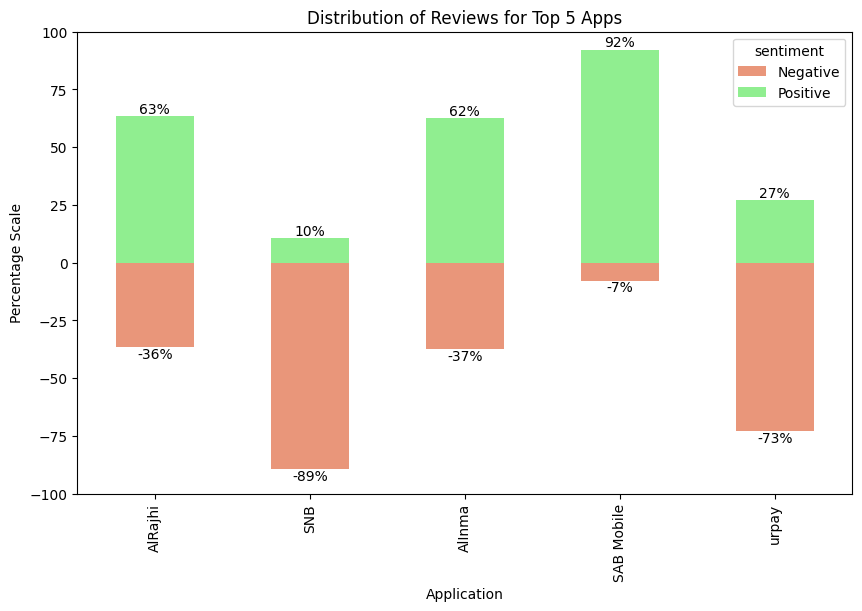

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Grouped.csv')

# Group the data by app and sentiment category
grouped_data = data.groupby(['Pattern', 'sentiment']).size().unstack(fill_value=0)

# Get the 5 apps with the most reviews
top_apps = grouped_data.sum(axis=1).nlargest(5).index
grouped_data = grouped_data.loc[top_apps]

# Normalize the data to percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Set negative sentiment values below 0
grouped_data.loc[:, 'Negative'] *= -1

# Create a stacked bar graph with annotations and custom colors
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['darksalmon', 'lightgreen'])
plt.title('Distribution of Reviews for Top 5 Apps')
plt.xlabel('Application')
plt.ylabel('Percentage Scale')

# Add annotations to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, labels=[f'{int(h):d}%' if h != 0 else '' for h in container.datavalues])

# Set y-axis limits to -100% and +100%
ax.set_ylim([-100, 100])
plt.show()

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9785 entries, 0 to 9784
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Source     9785 non-null   object
 1   Rating     9785 non-null   object
 2   text       9785 non-null   object
 3   sentiment  9785 non-null   object
 4   label      9785 non-null   object
dtypes: object(5)
memory usage: 382.4+ KB


In [ ]:
print(df['text'].isna().sum())


0


In [ ]:
df['text'] = df['text'].astype(str)
print(df.dtypes)

Source       object
Rating        int64
text         object
sentiment    object
label         int64
dtype: object


In [ ]:
import spacy
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the English language model in spacy
nlp = spacy.load('en_core_web_sm')

# Load the stopwords and lemmatizer in nltk
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Define the clean function to preprocess text
def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

# Replace any missing or null values with an empty string
df['text'] = df['text'].fillna('')

# Apply the clean function to the 'text' column
df['text'] = df['text'].apply(clean)


In [ ]:
df

,Source,Rating,text,sentiment,label
0,stc pay,1,👎 👎 👎 press word use current site work complet...,Negative,0
1,stc pay,5,easy reliable greatest app money transfer saud...,Positive,1
2,stc pay,1,bad beyond measure comments pleases account cu...,Negative,0
3,stc pay,1,complaint problem paid riyals ship ps amount w...,Negative,0
4,stc pay,1,moldy application transfer delivered except hu...,Negative,0
...,...,...,...,...,...
9780,اليسر,5,may accept request promotional code,Positive,1
9781,اليسر,3,promo code promo code,Negative,0
9782,اليسر,5,terrible program easy smooth use steps short 👍 🏻,Positive,1
9783,اليسر,5,program excellent save time effort easy use,Positive,1


In [ ]:
!pip install emoji --upgrade
!pip install emoji
from emoji import emojize
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8c0bb7ad6c0cdd99340e14e0bea80c4af024f899a26893c3811cc5896045a23a
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install emoji
import emoji

df['text'] = df['text'].apply(lambda x: emoji.demojize(x))

# Save to an output file
with open('translated_file.csv', 'w') as f:
    df.to_csv('cleaned_file.csv', index=False)
df

,Source,Rating,text,sentiment,label
0,stc pay,1,:thumbs_down: :thumbs_down: :thumbs_down: pres...,Negative,0
1,stc pay,5,easy reliable greatest app money transfer saud...,Positive,1
2,stc pay,1,bad beyond measure comments pleases account cu...,Negative,0
3,stc pay,1,complaint problem paid riyals ship ps amount w...,Negative,0
4,stc pay,1,moldy application transfer delivered except hu...,Negative,0
...,...,...,...,...,...
9780,اليسر,5,may accept request promotional code,Positive,1
9781,اليسر,3,promo code promo code,Negative,0
9782,اليسر,5,terrible program easy smooth use steps short :...,Positive,1
9783,اليسر,5,program excellent save time effort easy use,Positive,1


# Keras LSTM


In [ ]:
# load dataset
df = pd.read_csv('cleaned_file.csv')
df.dropna(inplace=True) # remove any NaN values
df.reset_index(drop=True, inplace=True) # reset index after removing NaN values
reviews = df['text'].values
labels = df['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
encoded_labels = np.array(encoded_labels) # convert to NumPy array if not already
encoded_labels = encoded_labels.reshape(-1, 1) # reshape to (None, 1)
from keras.utils import to_categorical
train_labels = to_categorical(encoded_labels, num_classes=10)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, train_labels, stratify = encoded_labels)

# Hyperparameters of the model
vocab_size = 20000 # choose based on statistics
oov_tok = '<OOV>'
embedding_dim = 300 # increase embedding dimension
max_length = 1000 # increase max_length
padding_type='post'
trunc_type='pre'

# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

from keras.layers import Dropout, BatchNormalization

# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Conv1D(256, 5, activation='relu'), # increase number of filters
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(128, activation='relu'), # increase number of units in dense layer
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001) # use a lower learning rate
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
model.summary()

# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
num_epochs = 50
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1, callbacks=[early_stop])

# evaluate the model
metrics_df = pd.DataFrame(history.history)
print(metrics_df)
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = np.argmax(prediction, axis=1)
print("Accuracy of prediction on test set : ", accuracy_score(np.argmax(test_labels, axis=1), pred_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         6000000   
                                                                 
 conv1d (Conv1D)             (None, 996, 256)          384256    
                                                                 
 batch_normalization (BatchN  (None, 996, 256)         1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 996, 256)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               3

KeyboardInterrupt: ignored

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

# load dataset
df = pd.read_csv('cleaned_file.csv')

# encode labels
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, stratify=df['sentiment'])

# hyperparameters
vocab_size = 10000
max_length = 500
embedding_dim = 100
oov_tok = '<OOV>'
num_epochs = 15
batch_size = 64
learning_rate = 0.1
decay_rate = learning_rate / num_epochs

X_train = X_train.astype(str)
X_test = X_test.astype(str)

# initialize tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
X_train.fillna('', inplace=True)
tokenizer.fit_on_texts(X_train)
print(X_train.isnull().sum())

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# convert test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)



# download pre-trained embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# load embeddings into a dictionary
embeddings_index = {}
#with open('glove.6B.100d.txt') as f:
#   for line in f:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')

# create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# define model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# define learning rate schedule
def lr_scheduler(epoch):
    lr = learning_rate * (1 / (1 + decay_rate * epoch))
    return lr

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit model
history = model.fit(train_padded, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1,
                    validation_split=0.1,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)])
# evaluate model
loss, accuracy = model.evaluate(test_padded, y_test, verbose=1)
print('Test accuracy:', accuracy)
# make predictions
predictions = model.predict(test_padded)
predictions = np.round(predictions).astype(int)
# calculate accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

# Model 1: CNN

In [ ]:
# load dataset
df = pd.read_csv('cleaned_file.csv')
df.dropna(inplace=True) # remove any NaN values
df.reset_index(drop=True, inplace=True) # reset index after removing NaN values
reviews = df['text'].values
labels = df['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
encoded_labels = np.array(encoded_labels) # convert to NumPy array if not already
encoded_labels = encoded_labels.reshape(-1, 1) # reshape to (None, 1)
from keras.utils import to_categorical
train_labels = to_categorical(encoded_labels, num_classes=10)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, train_labels, stratify = encoded_labels)

# Hyperparameters of the model
vocab_size = 20000 # choose based on statistics
oov_tok = '<OOV>'
embedding_dim = 300 # increase embedding dimension
max_length = 1000 # increase max_length
padding_type='post'
trunc_type='pre'

# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

from keras.layers import Dropout, BatchNormalization

# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Conv1D(256, 5, activation='relu'), # increase number of filters
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(128, activation='relu'), # increase number of units in dense layer
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
opt = keras.optimizers.Adam(learning_rate=0.00001) # use a lower learning rate
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
model.summary()

# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
num_epochs = 50
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1, callbacks=[early_stop])

# evaluate the model
metrics_df = pd.DataFrame(history.history)
print(metrics_df)
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = np.argmax(prediction, axis=1)
print("Accuracy: ", accuracy_score(np.argmax(test_labels, axis=1), pred_labels))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         6000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 996, 256)          384256    
                                                                 
 batch_normalization_2 (Batc  (None, 996, 256)         1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 996, 256)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# evaluate the model on test set
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = np.argmax(prediction, axis=1)
test_labels_decoded = np.argmax(test_labels, axis=1)
accuracy = accuracy_score(test_labels_decoded, pred_labels)
f1 = f1_score(test_labels_decoded, pred_labels, average='macro')
print('Accuracy:', accuracy)
print('F1 score:', f1)

fpr, tpr, thresholds = roc_curve(np.argmax(test_labels, axis=1), prediction[:, 1])
roc_auc = roc_auc_score(np.argmax(test_labels, axis=1), prediction[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--',color='navy',)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = np.argmax(prediction, axis=1)
print("Accuracy: ", accuracy_score(np.argmax(test_labels, axis=1), pred_labels))

# Model 2: BERT

In [ ]:
# import required libraries
from sklearn.preprocessing import LabelEncoder
!pip install tensorflow keras
from tensorflow import keras
from tensorflow.keras import callbacks
!pip install --upgrade tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install transformers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from transformers import TFBertModel, BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00


In [ ]:
# load dataset
df = pd.read_csv('cleaned_file.csv')

# encode labels
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

# train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, stratify=df['sentiment'])

# initialize tokenizer and encode text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_encodings = tokenizer(X_train.astype(str).tolist(), truncation=True, padding=True, max_length=128)
X_test_encodings = tokenizer(X_test.astype(str).tolist(), truncation=True, padding=True, max_length=128)

# create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train
)).shuffle(len(X_train)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test
)).batch(16)

# define model architecture
def create_model():
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
    embeddings = bert_model(input_ids, attention_mask=attention_mask)[1]
    dropout = tf.keras.layers.Dropout(0.3)(embeddings)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout)
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# create the model
model = create_model()

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# train the model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# evaluate the model
_, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


490/490 [==============================] - 279s 473ms/step - loss: 0.3337 - accuracy: 0.8634 - val_loss: 0.2585 - val_accuracy: 0.9009
Epoch 2/5
490/490 [==============================] - 225s 460ms/step - loss: 0.2424 - accuracy: 0.9125 - val_loss: 0.2473 - val_accuracy: 0.9065
Epoch 3/5
490/490 [==============================] - 225s 459ms/step - loss: 0.1992 - accuracy: 0.9313 - val_loss: 0.2629 - val_accuracy: 0.9101
Epoch 4/5
490/490 [==============================] - 225s 460ms/step - loss: 0.1555 - accuracy: 0.9462 - val_loss: 0.2963 - val_accuracy: 0.9019
Epoch 5/5
123/123 [==============================] - 18s 150ms/step - loss: 0.3437 - accuracy: 0.8978
Test accuracy: 0.8978027701377869


123/123 [==============================] - 23s 155ms/step
AUC: 0.947906204003765


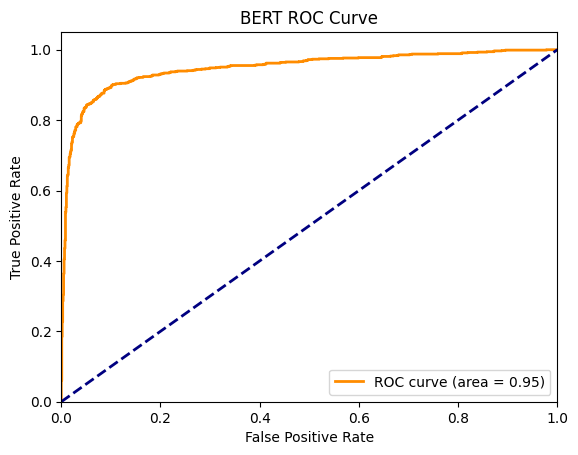

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# evaluate the model on test data and print ROC curve and AUC
y_true = y_test[:len(y_pred)]
y_pred = model.predict(test_dataset)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print('AUC:', roc_auc)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BERT ROC Curve')
plt.legend(loc="lower right")
plt.show()

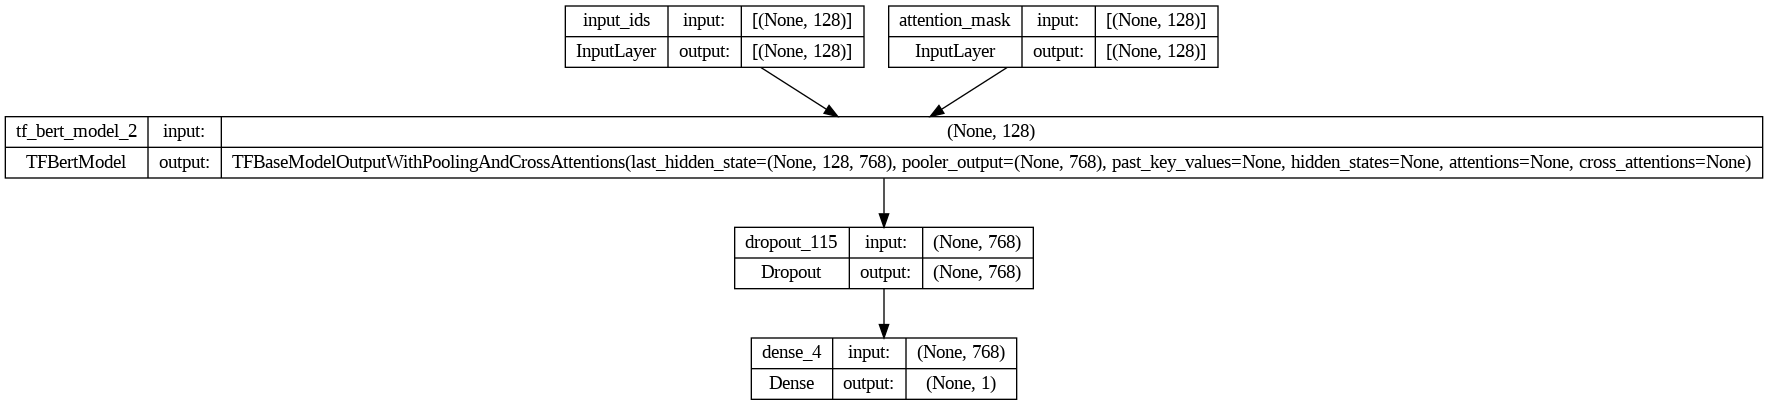

In [ ]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture
plot_model(model, to_file='bert_model.png', show_shapes=True, show_layer_names=True)

# Model 3: Naive Bayes


Accuracy: 0.8743188010899182
F-score: 0.8738980315861548


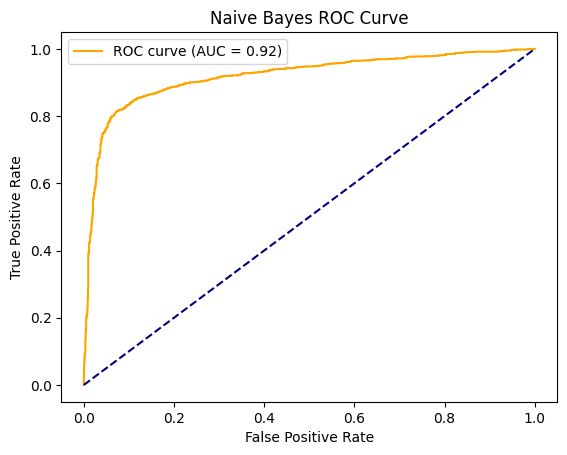

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Load the CSV file into a pandas dataframe
data = pd.read_csv('cleaned_file.csv')
data = data.astype(str)

# Define the input and output variables
X = data['text']
y = data['sentiment']

# Convert the categorical labels to binary labels
le = LabelEncoder()
y = le.fit_transform(y)

# Vectorize the text using a CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
split = int(0.7 * len(X))
X_train = X_vec[:split]
y_train = y[:split]
X_test = X_vec[split:]
y_test = y[split:]

# Train a Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1score = f1_score(y_test, y_pred, average='weighted')
print('F-score:', f1score)
# Get the predicted probabilities for the testing data
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score for the testing data
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score), color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()

# Model 4: Decision Tree


Accuracy: 0.8385558583106267
F1 score: 0.8365154727535187
AUC: 0.8493041261227545


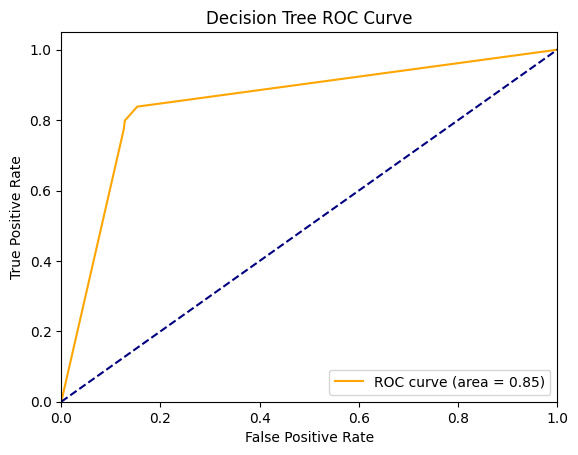

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
data = pd.read_csv('cleaned_file.csv')
data = data.astype(str)

# Define the input and output variables
X = data['text']
y = data['sentiment']

# Vectorize the text using a CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=1)

# Train a Decision Tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy score, F1 score, ROC curve and AUC
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
prob = clf.predict_proba(X_test)
unique_labels = y_test.unique() # get unique labels in y_test
pos_label = 'positive' if 'positive' in unique_labels else unique_labels[0] # set pos_label to 'positive' if it's in unique_labels, otherwise use the first label
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1], pos_label=pos_label)
auc = roc_auc_score(y_test, prob[:, 1])
print('Accuracy:', accuracy)
print('F1 score:', f1)
print('AUC:', auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the CSV file into a pandas dataframe
data = pd.read_csv('cleaned_file.csv')
data = data.astype(str)

# Define the input and output variables
X = data['text']
y = data['sentiment']

# Vectorize the text using a CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train a Decision Tree classifier on the training data with a depth of 1
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_vec, y)

# Export the decision tree as a Graphviz DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=list(vectorizer.vocabulary_.keys()),
                           class_names=clf.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph as a PNG file and save to disk
graph.render("decision_tree", format="png")

'decision_tree.png'

# Model 5: SVM


Accuracy: 0.898841961852861
F1 score: 0.897523705793031
AUC: 0.9502100486526946


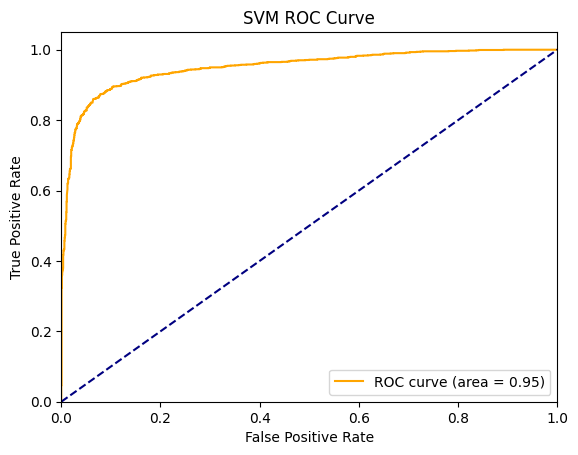

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Load the CSV file into a pandas dataframe
data = pd.read_csv('cleaned_file.csv')
data = data.astype(str)

# Define the input and output variables
X = data['text']
y = data['sentiment']

# Vectorize the text using a TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=1)

# Train a SVM classifier on the training data
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy score, F1 score, ROC curve and AUC
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
prob = clf.predict_proba(X_test)
unique_labels = y_test.unique() # get unique labels in y_test
pos_label = 'positive' if 'positive' in unique_labels else unique_labels[0] # set pos_label to 'positive' if it's in unique_labels, otherwise use the first label
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1], pos_label=pos_label)
auc = roc_auc_score(y_test, prob[:, 1])
print('Accuracy:', accuracy)
print('F1 score:', f1)
print('AUC:', auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Thematic Analysis

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-25 12:53:25.661990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from collections import Counter

def apply_thematic_analysis(data, column_name):
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Step 1: Extract adjective-noun phrases and build frequency distribution
    adj_noun_phrases = []
    for text in data[column_name]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == 'ADJ' and token.head.pos_ == 'NOUN':
                adj_noun_phrases.append((token.text, token.head.text))

    fdist = Counter(adj_noun_phrases)

    # Step 2: Print the top 5 phrases
    print("Top 10 Phrases (Adjective - Noun):")
    for (adj, noun), frequency in fdist.most_common(10):
        print(adj, "-", noun, "-", frequency)

# Example usage
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_csv('cleaned_file.csv')
data = data.astype(str)

# Specify the column name you want to analyze
column_name = 'text'

# Apply thematic analysis and print the results
apply_thematic_analysis(data, column_name)


Top 5 Phrases (Adjective - Noun):
new - update - 243
bad - application - 227
easy - use - 193
bad - update - 186
excellent - application - 169
bad - app - 152
last - update - 137
medium - light_skin_tone - 109
best - application - 92
latest - update - 89


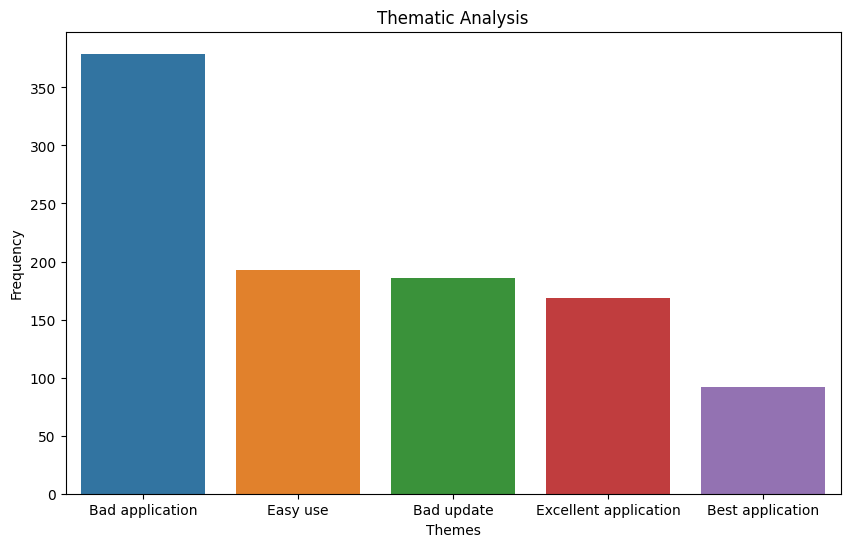

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your data
# Assuming you have a DataFrame with two columns: 'Themes' and 'Frequency'
data = pd.DataFrame({
    'Themes': ['Bad application', 'Easy use', 'Bad update', 'Excellent application', 'Best application'],
    'Frequency': [379, 193, 186, 169, 92]
})

# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Themes', y='Frequency', data=data)

# Step 3: Customize the plot
plt.title('Thematic Analysis')
plt.xlabel('Themes')
plt.ylabel('Frequency')

# Step 4: Display the plot
plt.show()
